# Disk Stars

In [1]:
from typing import Optional, Tuple
from astropy.io import fits
from astropy.table import Table, vstack
import numpy as np
import pandas as pd
import glob
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
import matplotlib.cm as cm
import seaborn as sns
sns.set_theme(style="ticks")

In [2]:
# Open the FITS files
# Define the pattern to match FITS files
pattern = '../Disk_Lomeli/*.fits'

# Use glob to find all FITS files in the current directory
fits_files = glob.glob(pattern)

print(fits_files)

['../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_1_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_8_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_4_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_7_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_2_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_6_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_5_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_3_disco.fits', '../Disk_Lomeli/catalog_all_bands_all_fovs_all_sources_pueba_9_disco.fits']


In [3]:
# Create an empty list to store individual tables
tables = []
    

In [4]:
# Loop through each FITS file and read it into a Table
for file in fits_files:
    with fits.open(file) as hdul:
        # Extract data from the FITS file
        data = hdul[1].data  # Assuming the data is in the first extension (HDU index 1)
        
        # Convert the data to a Table
        table = Table(data)
        
        # Append the Table to the list
        tables.append(table)

In [5]:
# Concatenate all Tables into a single Table
final_table_ = vstack(tables)
final_table_

<Table length=9297468>
NUMBER       ALPHA               DELTA        ... area_r  mumax_r  kron_radius_r
int32       float64             float64       ... int16   float64     float64   
------ ------------------ ------------------- ... ------ --------- -------------
     1 101.12644465695432 -10.612184907318111 ...    360 13.946505           3.5
     2 101.22978673763829 -10.613081022602527 ...    348  14.25836           3.5
     4 101.16174743658358  -10.61482234181521 ...    177 15.446119           3.5
     6 101.13987401313562 -10.614493027260734 ...     82 17.151478           3.5
    18 101.48501334068615  -10.61194226048895 ...    141 15.741087           3.5
    19 101.24259368990718 -10.614471770489988 ...     29  19.34411           3.5
    22   101.133690933046  -10.61453930354514 ...     29   19.2319           3.5
    26 101.48208672753326 -10.606132785201316 ...    434 13.680695           3.5
    27 101.23395094345061 -10.614958421917468 ...     22 19.847305           3.5
   ...                ...                 ... ...    ...       ...           ...
154196 133.15242494582034 -58.678548071177005 ...     32  19.84222           3.5
154202 133.77478900619136  -58.63341552771152 ...     39   19.5748           3.5
154207 131.41661925927176  -58.65174809377939 ...     84 17.685196           3.5
154214 131.76055588535746  -58.67178342765507 ...     21 20.445192           3.5
154217 133.78232558624563  -58.67359750686801 ...     68 18.067163           3.5
154221 133.28021718646767  -58.63125910365725 ...     20 20.928373           3.5
154224  133.1811790685612 -58.680841156452956 ...     29 20.307621           3.5
154225  132.5514264280212   -58.6803192843011 ...     25  20.44012           3.5
154230 133.88788552302333  -58.67729991483857 ...     29 20.255592           3.5
154231  133.8841471077617  -58.66888231352096 ...     32  19.77191           3.5

In [6]:
# Define conditions for filtering the table
mask_fields = (final_table_["field"] == "d049") | \
              (final_table_["field"] == "d203") | \
              (final_table_["field"] == "d218") | \
              (final_table_["field"] == "d243") | \
              (final_table_["field"] == "d262")

final_table = final_table_[~mask_fields]
len(final_table)

8996938

### Cleaning

In [7]:
final_table.colnames


['NUMBER',
 'ALPHA',
 'DELTA',
 'u',
 'uerr',
 'g',
 'gerr',
 'r',
 'rerr',
 'i',
 'ierr',
 'z',
 'zerr',
 'F378',
 'F378err',
 'F395',
 'F395err',
 'F410',
 'F410err',
 'F430',
 'F430err',
 'F515',
 'F515err',
 'F660',
 'F660err',
 'F861',
 'F861err',
 'flags_i',
 'fwhm_i',
 'fwhm_psf_i',
 'ellog_i',
 'ellip_i',
 'class_i',
 'spread_i',
 'flux_radius_i',
 'area_i',
 'mumax_i',
 'mag_aper2_i',
 'magerr_apper2_i',
 'mag_aper4_i',
 'magerr_apper4_i',
 'mag_aper6_i',
 'magerr_apper6_i',
 'flux_aper6_u',
 'fluxerr_aper6_u',
 'flux_aper6_g',
 'fluxerr_aper6_g',
 'flux_aper6_r',
 'fluxerr_aper6_r',
 'flux_aper6_i',
 'fluxerr_aper6_i',
 'flux_aper6_z',
 'fluxerr_aper6_z',
 'flux_aper6_F378',
 'fluxerr_aper6_F378',
 'flux_aper6_F395',
 'fluxerr_aper6_F395',
 'flux_aper6_F410',
 'fluxerr_aper6_F410',
 'flux_aper6_F430',
 'fluxerr_aper6_F430',
 'flux_aper6_F515',
 'fluxerr_aper6_F515',
 'flux_aper6_F660',
 'fluxerr_aper6_F660',
 'flux_aper6_F861',
 'fluxerr_aper6_F861',
 'x',
 'y',
 'field',
 'a

In [8]:
# Masking, usar FLATS menor que 4
# Masking
# Define SNR threshold
snr_threshold = 5

# Calculate SNR for each band
snr_r = final_table["r"] / final_table["rerr"]
snr_F660 = final_table["F660"] / final_table["F660err"]
snr_i = final_table["i"] / final_table["ierr"]

# Masking for SNR
m_snr = (snr_r >= snr_threshold) & (snr_F660 >= snr_threshold) & (snr_i >= snr_threshold)

m_x =  (final_table["r"] >= 13) & (final_table["r"] <= 19.5) &\
       (final_table["F660"] <= 19.4) & (final_table["i"] <= 19.2) 

m_err = (final_table["rerr"] <= 0.2) & \
        (final_table["F660err"] <= 0.2) & \
        (final_table["ierr"] <= 0.2)


#m_sn = (tab["s2n_r_PStotal"] >= 10) & \
#       (tab["s2n_J0660_PStotal"] >= 10) & \
#        (tab["s2n_i_PStotal"] >= 10)

m_ell = (final_table["ellip_r"] <= 0.2) & (final_table["ellip_i"] <= 0.2)

m_50 = (final_table["flux_radius_r"] <= 3) & (final_table["flux_radius_i"] <= 3)

flags = (final_table["flags_r"] == 0) & (final_table["flags_i"] == 0)

class_star = (final_table["class_r"] > 0.5) & (final_table["class_i"] > 0.5)


mask = m_snr & m_x & m_err & m_ell & m_50 & flags & class_star # Use fwhm_mask instead of valid_fwhm_range
tab_clean = final_table[mask]


In [9]:
#7352124

In [10]:
tab_clean

<Table length=7352124>
NUMBER       ALPHA               DELTA        ... area_r  mumax_r  kron_radius_r
int32       float64             float64       ... int16   float64     float64   
------ ------------------ ------------------- ... ------ --------- -------------
     4 101.16174743658358  -10.61482234181521 ...    177 15.446119           3.5
     6 101.13987401313562 -10.614493027260734 ...     82 17.151478           3.5
    19 101.24259368990718 -10.614471770489988 ...     29  19.34411           3.5
    22   101.133690933046  -10.61453930354514 ...     29   19.2319           3.5
    27 101.23395094345061 -10.614958421917468 ...     22 19.847305           3.5
    29 101.45020396757316 -10.613563336103292 ...     69 17.556313           3.5
    30 101.18103695081625  -10.61414814675913 ...     28  19.17559           3.5
    32 101.25957515519961 -10.615015989092523 ...     15  20.62055           3.5
    34 101.83023867064924 -10.611711502335641 ...    145 15.928015           3.5
   ...                ...                 ... ...    ...       ...           ...
154192  132.5582114957105  -58.66919401234816 ...    183  16.30948           3.5
154196 133.15242494582034 -58.678548071177005 ...     32  19.84222           3.5
154202 133.77478900619136  -58.63341552771152 ...     39   19.5748           3.5
154207 131.41661925927176  -58.65174809377939 ...     84 17.685196           3.5
154214 131.76055588535746  -58.67178342765507 ...     21 20.445192           3.5
154221 133.28021718646767  -58.63125910365725 ...     20 20.928373           3.5
154224  133.1811790685612 -58.680841156452956 ...     29 20.307621           3.5
154225  132.5514264280212   -58.6803192843011 ...     25  20.44012           3.5
154230 133.88788552302333  -58.67729991483857 ...     29 20.255592           3.5
154231  133.8841471077617  -58.66888231352096 ...     32  19.77191           3.5

In [11]:
ri = tab_clean["r"] - tab_clean["i"]
rj660 = tab_clean["r"] - tab_clean["F660"]

In [12]:
def equation(m, c, x):
    # Define your equation here, for example, a linear equation: y = mx + c
    y = m * x + c
    return y

In [13]:
def plots(
    color1: np.ndarray,
    color2: np.ndarray,
    x_values: np.ndarray,
    y_values: np.ndarray,
    y_values1: Optional[np.ndarray] = None,
    sample_size: Optional[int] = None,
    xlim: Optional[Tuple[float, float]] = None,
    ylim: Optional[Tuple[float, float]] = None,
    density_method: str = "gaussian_kde",
    colormap: str = "viridis",
    label1: str = None,
    label2: str = None,
    label3: str = None,
    title: str = "Scatter Plot with Density Coloring"
) -> None:
    """
    Plots a scatter plot with points colored based on their density and one or two lines 
    defined by x_values, y_values, and optionally y_values1.
    """

    # Handle sampling and duplicate colors, ensuring equal lengths
    if sample_size is not None:
        unique_indices = np.random.choice(len(color1), size=sample_size, replace=False)
        color1, color2 = color1[unique_indices], color2[unique_indices]

    # Calculate density
    xy = np.vstack([color1, color2])
    if density_method == "gaussian_kde":
        density = gaussian_kde(xy)(xy)
    else:
        raise NotImplementedError(f"Density method {density_method} not supported.")

    # Sort points by density
    sorted_indices = density.argsort()[::-1]  # Descending order
    color1, color2, density = color1[sorted_indices], color2[sorted_indices], density[sorted_indices]

    # Create plot
    fig, ax = plt.subplots(figsize=(14, 11))

    # Customize scatter plot
    scatter_collection = ax.scatter(
        color1,
        color2,
        c=density,
        s=10,
        cmap=colormap,
        alpha=0.8,
        label=label1 if label1 else "Color 1"
    )

    # Customize colorbar
    plt.colorbar(scatter_collection, label="Density")

    # Customize line plots
    plt.plot(x_values, y_values, linewidth=2, color="red", label=label2 if label2 else "Line 1")
    if y_values1 is not None:
        plt.plot(x_values, y_values1, linewidth=2, color="blue", label=label3 if label3 else "Line 2")

    # Set limits
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)

    # Add labels and title
    plt.xlabel(label1 if label1 else "Color 1")
    plt.ylabel(label2 if label2 else "Color 2")
    plt.title(title)

    # Add legend if labels are provided
    if label1 or label2 or label3:
        plt.legend()

    plt.show()

In [14]:
# Generate x values
x_values = np.linspace(-10, 10, 100)  # Generate 100 x values from 0 to 10

# Compute y values using the equation
y_values = equation(0.35, -0.55, x_values)

In [15]:
y_values1 = equation(0.35, 0.45, x_values)

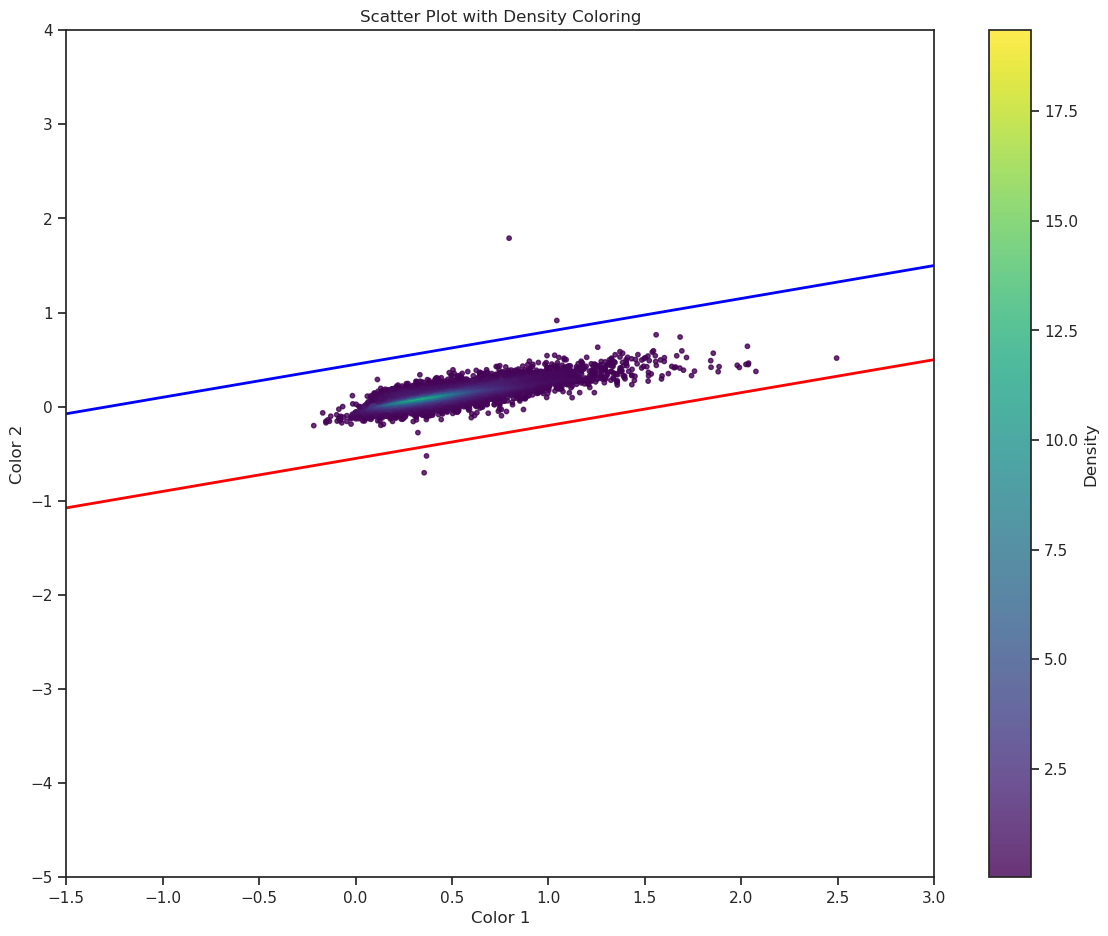

In [16]:
plots(ri, rj660, x_values, y_values, y_values1, xlim=(-1.5, 3), ylim=(-5, 4), sample_size=10000)

In [17]:
# Select objects below the line
# below_line = rj660 < equation(ri)
color_crit = (rj660  <= 0.35*ri - 0.55)

# upper_line = rj660 < equation(ri)
color_crit_upper = (rj660 >= 0.35*ri + 0.45)

In [18]:
tab_clean_below = tab_clean[color_crit]
len(tab_clean_below)

1641

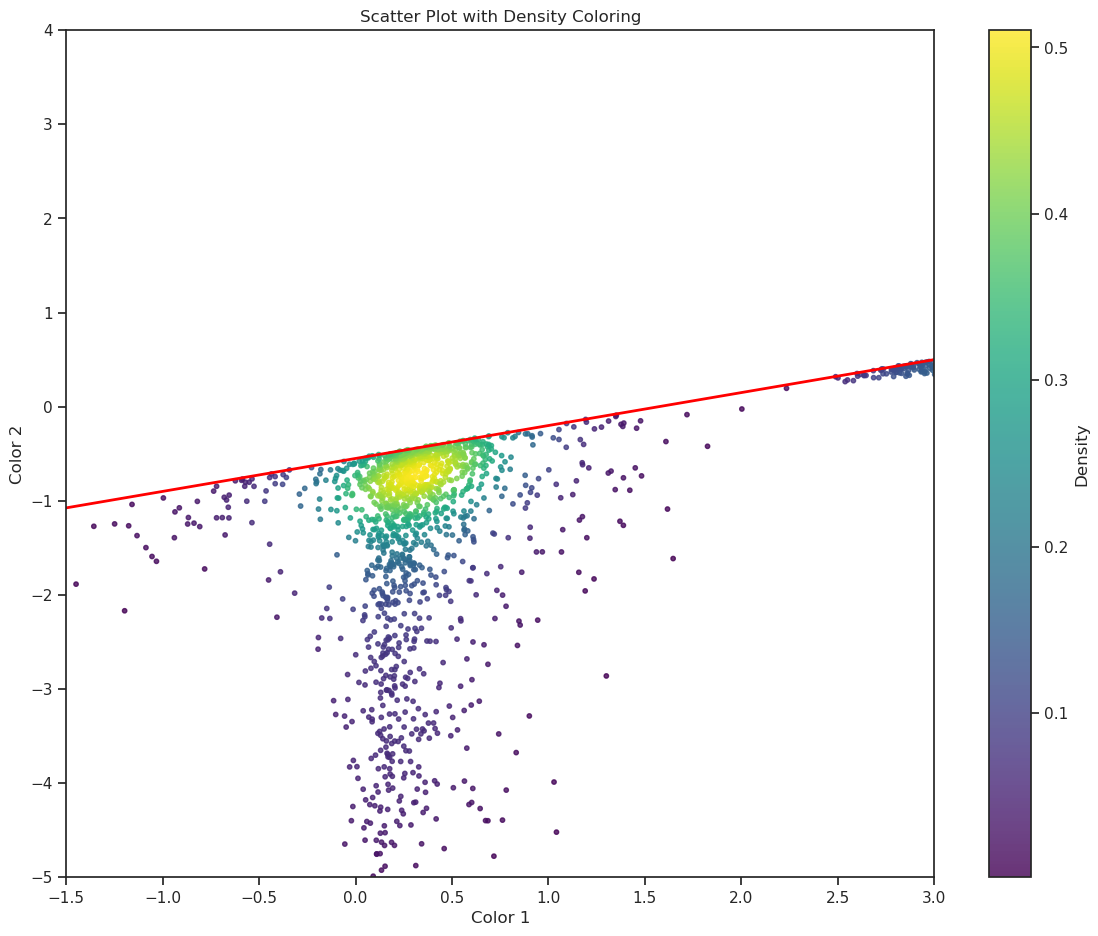

In [19]:
ri_below = tab_clean_below["r"] - tab_clean_below["i"]
rj660_below = tab_clean_below["r"] - tab_clean_below["F660"]



plots(ri_below, rj660_below, x_values, y_values, xlim=(-1.5, 3), ylim=(-5, 4))

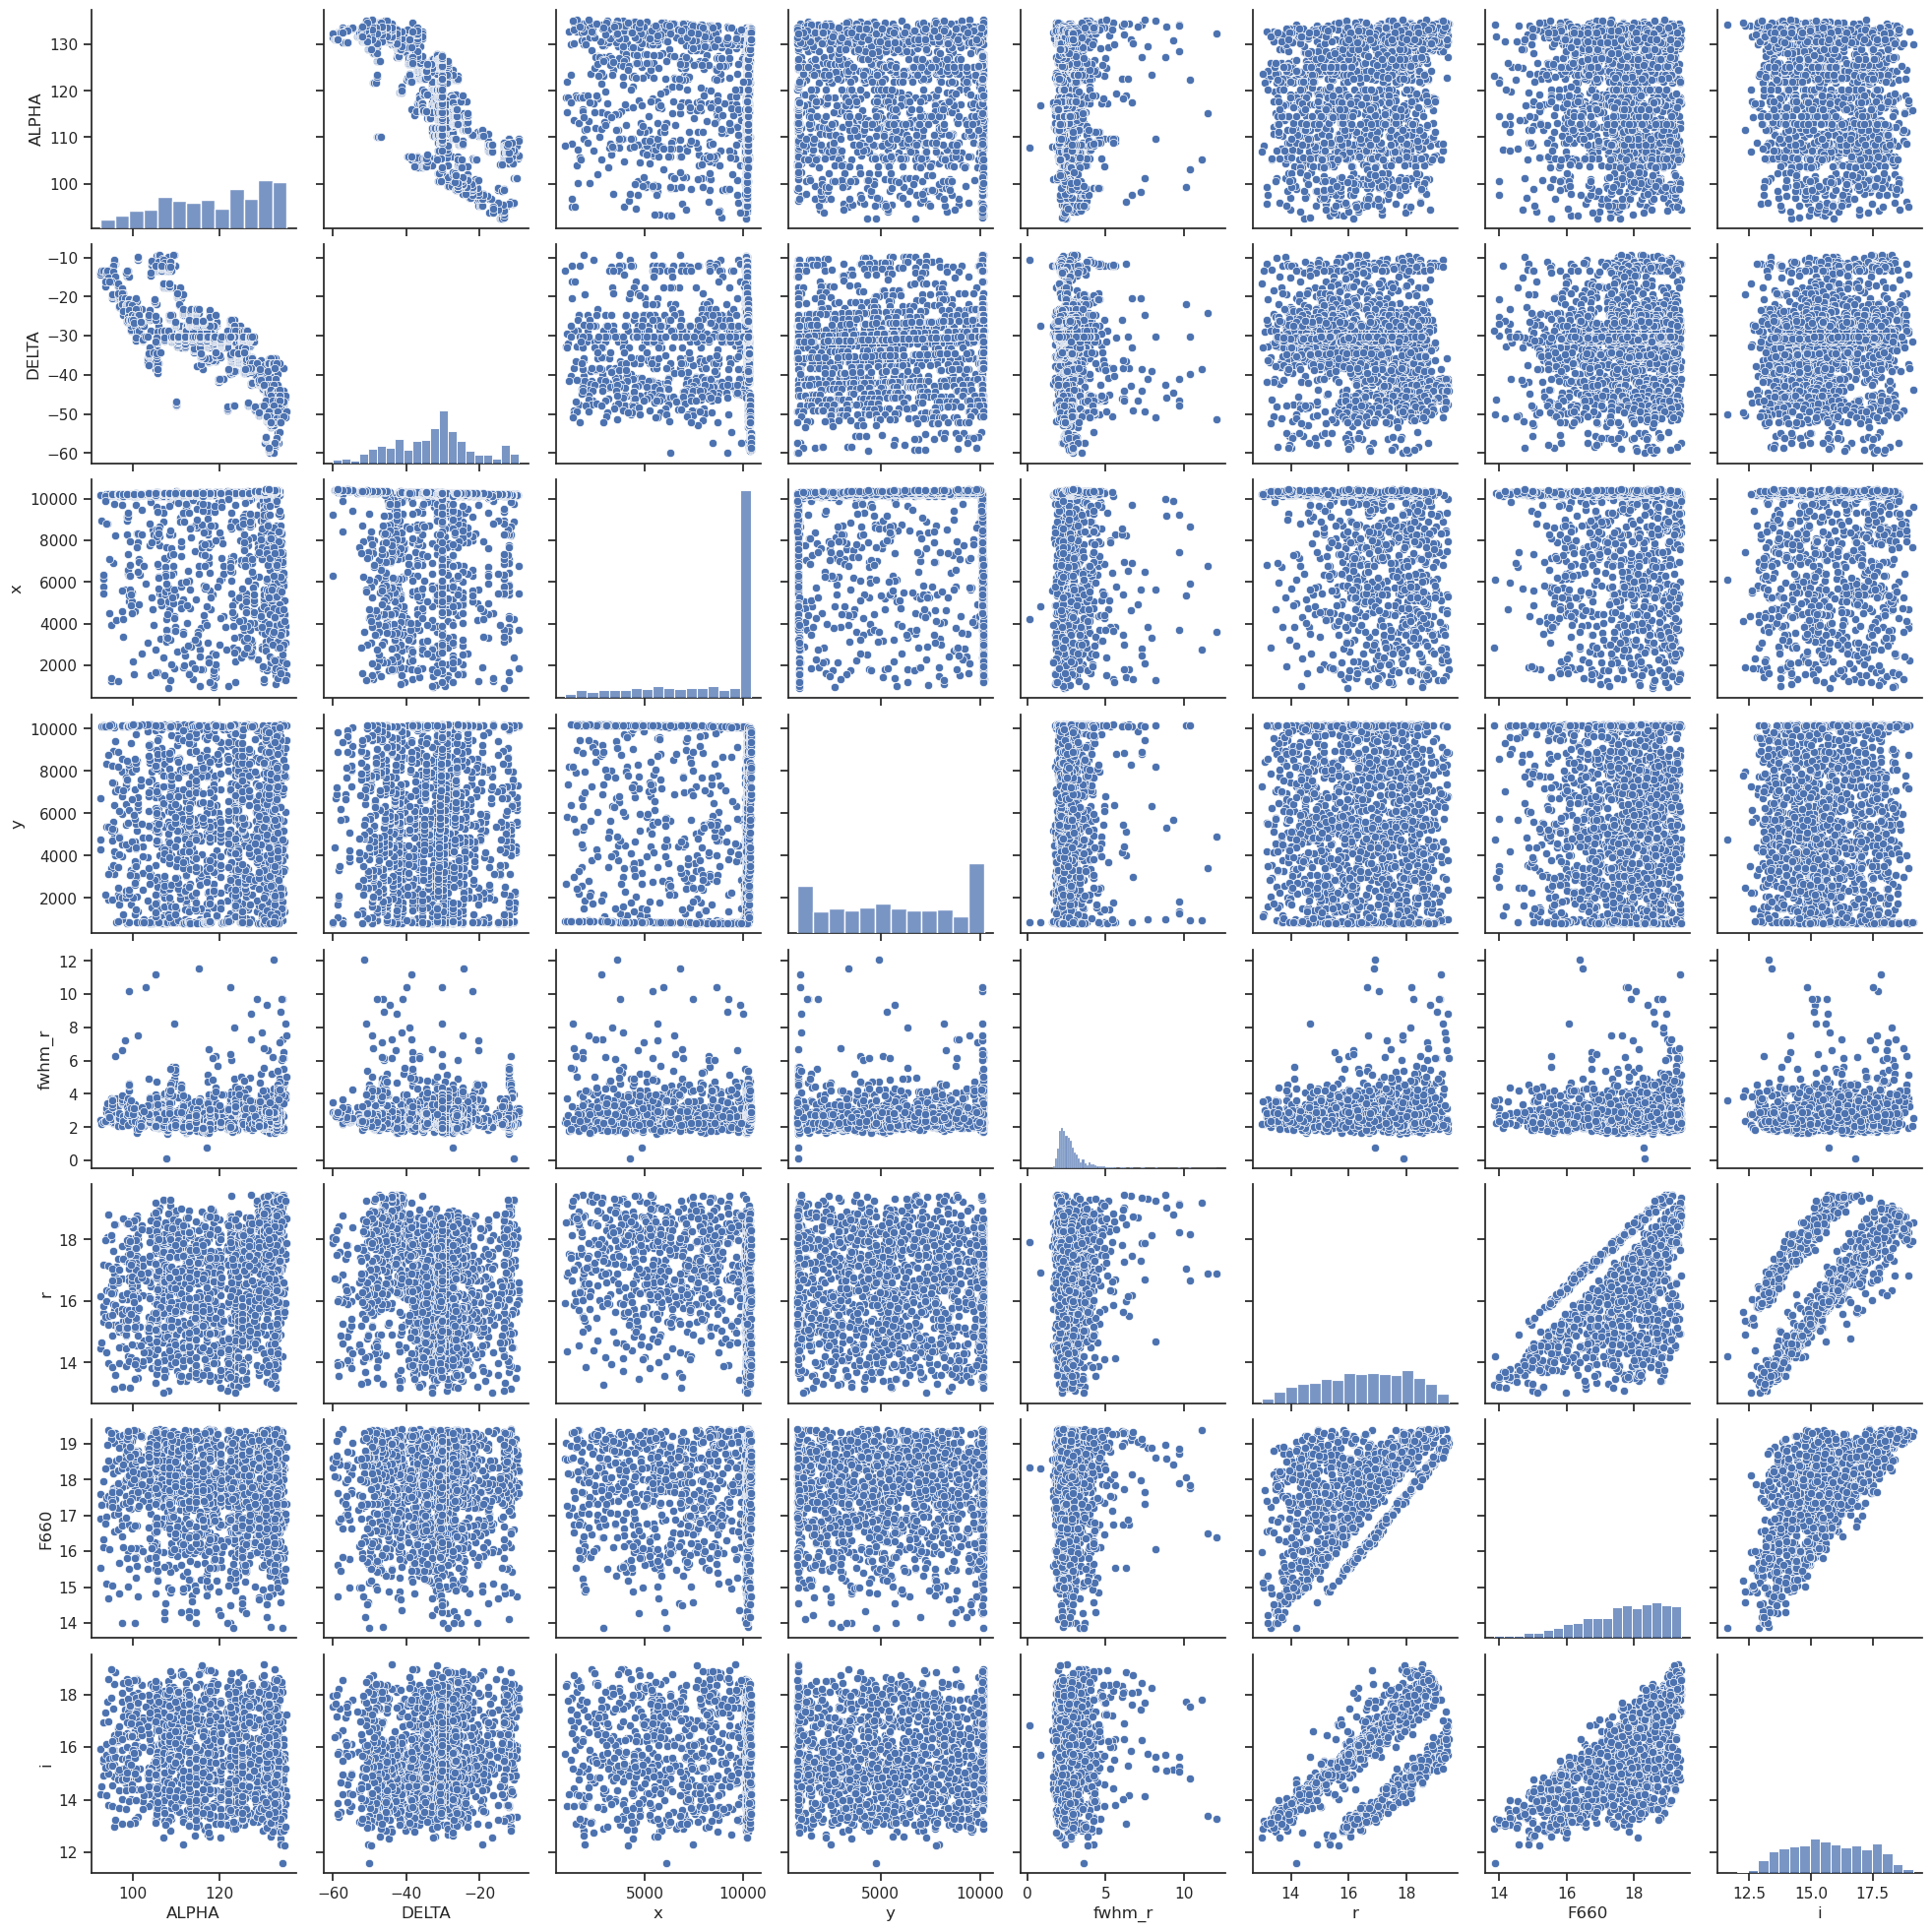

In [20]:
df_bellow = tab_clean_below.to_pandas()
#Select columns 
df_bellow_ = df_bellow[["ALPHA", "DELTA", "x", "y", "fwhm_r", "r", "F660", "i"]]
             
sns.pairplot(df_bellow_)

In [21]:
xx_values = np.linspace(100000, 10, 11000) 
yy = equation(444, -4510000, xx_values)
yyy = equation(-0.01, 10100, xx_values)
yyyy = equation(-0.013, 1050, xx_values)

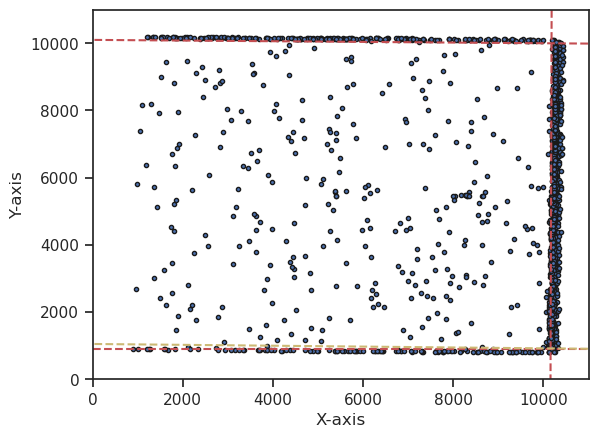

In [22]:
# Dropped the border
# Create a plot
plt.scatter(df_bellow["x"], df_bellow['y'], marker=".", edgecolors="k")
# Add horizontal line at y=0
#plt.axhline(y=10000, color='r', linestyle='--')
plt.axhline(y=900, color='r', linestyle='--')
plt.plot(xx_values, yyy, color='r',linestyle='--')
# Add vertical line at x=0
#plt.axvline(x=10000, color='g', linestyle='--')
plt.plot(xx_values, yy, color='r',linestyle='--')
plt.plot(xx_values, yyyy, color='y',linestyle='--')
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(0, 11000)
plt.ylim(0, 11000)
# Show the plot
plt.show()

### Upper

In [23]:
tab_clean_upper = tab_clean[color_crit_upper]
tab_clean_upper

<Table length=1358>
NUMBER       ALPHA               DELTA        ... area_r  mumax_r  kron_radius_r
int32       float64             float64       ... int16   float64     float64   
------ ------------------ ------------------- ... ------ --------- -------------
 21581 102.00115409658773 -10.364111021632276 ...     17 20.551216           3.5
 44062 101.99219195429943  -10.10488901009143 ...     16 20.619907           3.5
 59758 101.23517746266423  -9.924439770243934 ...     29  20.16497           3.5
 84642  101.2959788558612  -9.640380612123073 ...     24 20.108475           3.5
114386 101.64579915622147  -9.283852888813914 ...     17 20.635006           3.5
   319 106.51409588369934 -10.609298085472714 ...     22 18.960726           3.5
  8710 106.20078538995793  -10.50525599557571 ...     28 19.002687           3.5
 20490 106.44059137454653 -10.351077304585042 ...    110 17.288618           3.5
  3626 106.91336674199692 -10.560076877791676 ...     19 20.298027           3.5
   ...                ...                 ... ...    ...       ...           ...
 86854 135.27730056230416 -57.950210849510746 ...     17 18.469639           3.5
 87374 135.06953360676317  -57.94895726209009 ...     19 20.348232           3.5
121990  132.6483924848858  -57.65908867281079 ...     26 19.999245           3.5
130618 135.25534078744485 -57.588369074500214 ...     27 18.845411           3.5
134639 135.13913515665402 -57.556730271400944 ...     15 20.475687           3.5
156931 134.27001895965708  -57.37775948995089 ...     59 18.341309           3.5
 78393 132.29413345794626 -59.293429759812135 ...     17 20.770721           3.5
 96621 132.33361650306014 -59.126499134245826 ...     19 20.812128      3.942521
146409 131.19398645534037 -58.680781675334536 ...     26 20.090513           3.5
147773  132.1740940447022  -58.67464871494986 ...     34 19.997652           3.5

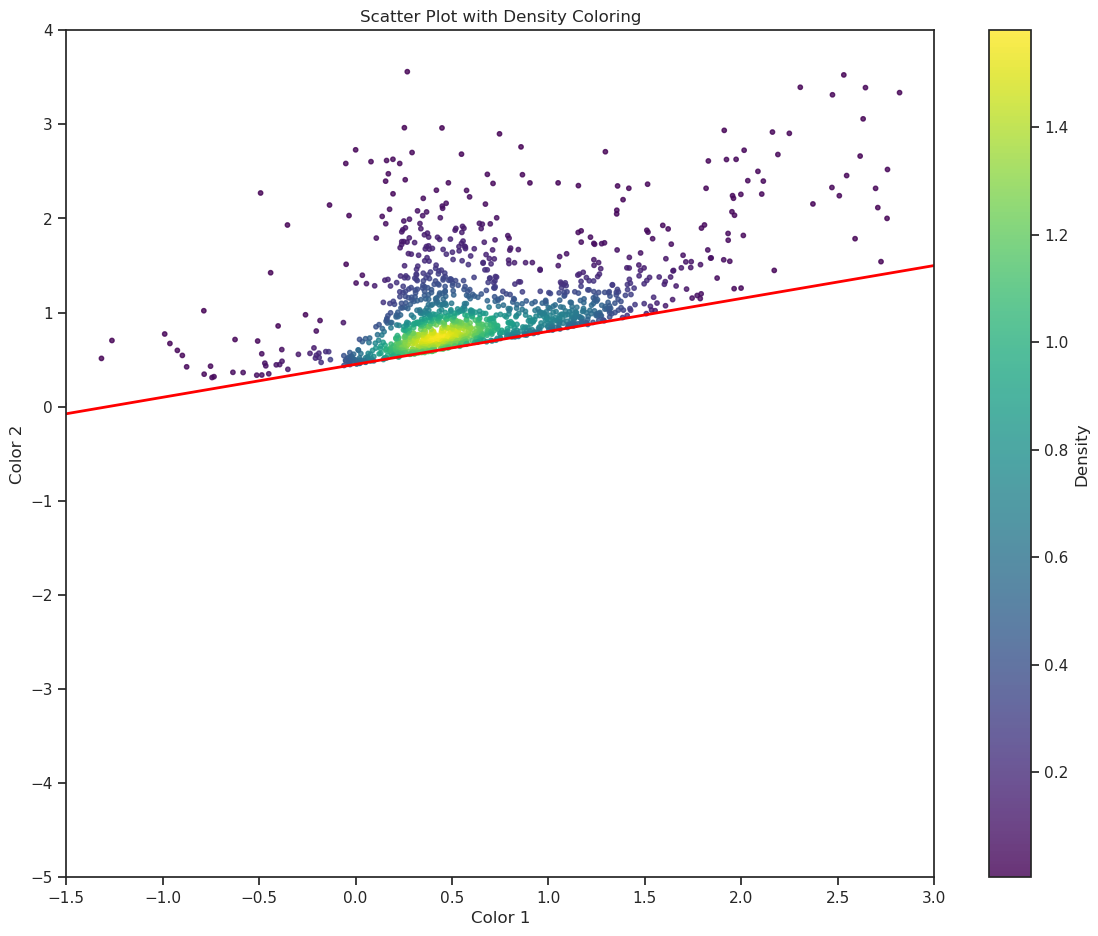

In [24]:
ri_upper = tab_clean_upper["r"] - tab_clean_upper["i"]
rj660_upper = tab_clean_upper["r"] - tab_clean_upper["F660"]


plots(ri_upper, rj660_upper, x_values, y_values1, xlim=(-1.5, 3), ylim=(-5, 4))

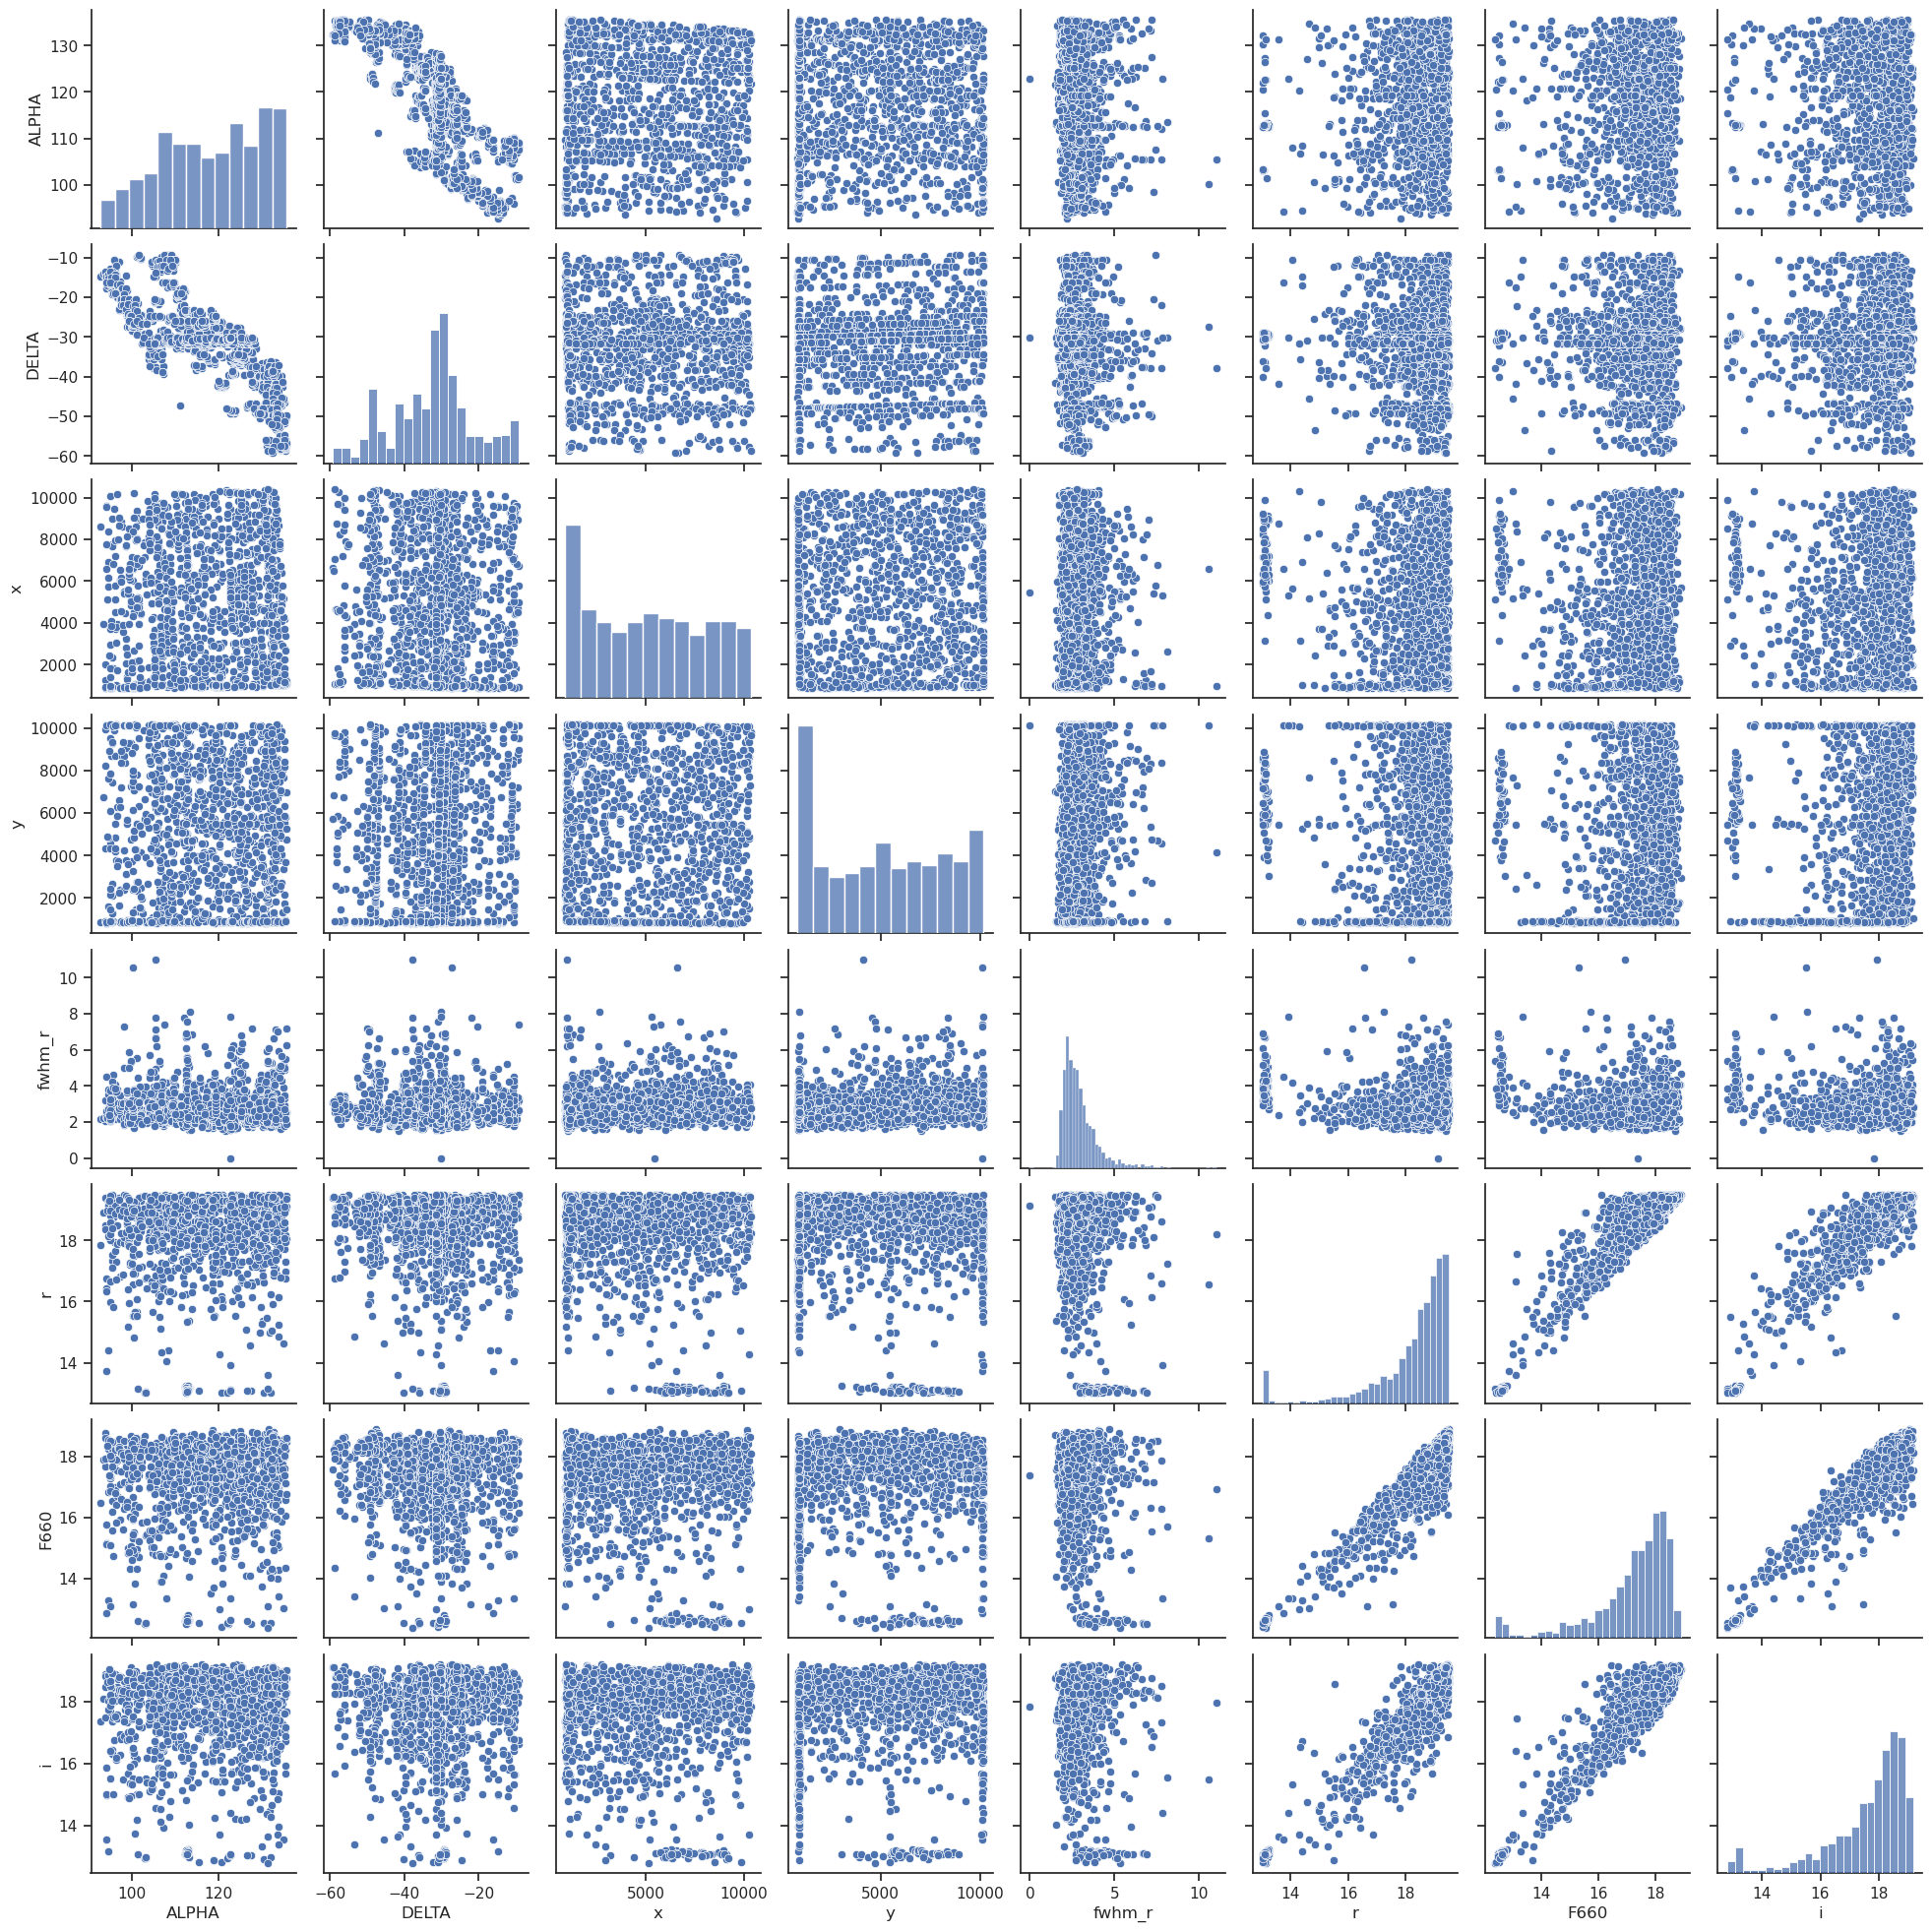

In [25]:
df_upper = tab_clean_upper.to_pandas()
#Select columns 
df_upper_ = df_upper[["ALPHA", "DELTA", "x", "y", "fwhm_r", "r", "F660", "i"]]
             
sns.pairplot(df_upper_)

In [26]:
yyyyy = equation(80, -86000, xx_values)#-4510000

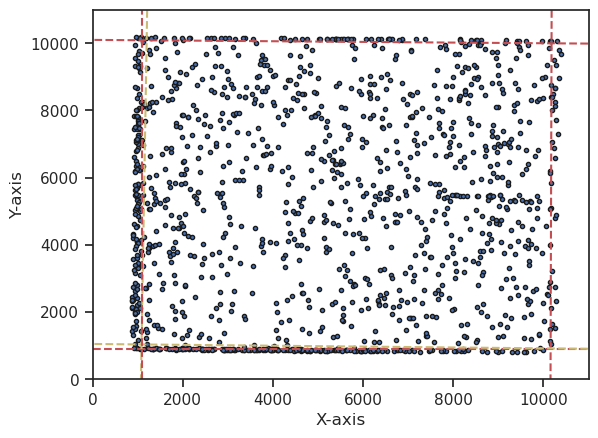

In [27]:
# Dropped the border
# Create a plot
plt.scatter(df_upper["x"], df_upper['y'], marker=".", edgecolors="k")
# Add horizontal line at y=0
#plt.axhline(y=10000, color='r', linestyle='--')
plt.axhline(y=900, color='r', linestyle='--')
plt.plot(xx_values, yyy, color='r',linestyle='--')
# Add vertical line at x=0
#plt.axvline(x=10000, color='g', linestyle='--')
plt.plot(xx_values, yy, color='r',linestyle='--')
plt.plot(xx_values, yyyyy, color='y',linestyle='--')
plt.plot(xx_values, yyyy, color='y',linestyle='--')
plt.axvline(x=1090, color='r', linestyle='--')
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(0, 11000)
plt.ylim(0, 11000)
# Show the plot
plt.show()

In [28]:
# Now dropping the borders
#yy = equation(444, -4510000, xx_values)
#yyy = equation(-0.01, 10100, xx_values)
border_crit = (tab_clean["y"]  >= 444*tab_clean["x"] - 4510000) & \
               (tab_clean["y"]  <= -0.01*tab_clean["x"] + 10100) & \
            (tab_clean["y"] <= 80*tab_clean["x"] - 86000) &  (tab_clean["y"] >= -0.013*tab_clean["x"] + 1050)

In [29]:
tab_clean_border = tab_clean[border_crit]
tab_clean_border

<Table length=7007778>
NUMBER       ALPHA               DELTA        ... area_r  mumax_r  kron_radius_r
int32       float64             float64       ... int16   float64     float64   
------ ------------------ ------------------- ... ------ --------- -------------
   599 101.43582213090102  -10.59673759653088 ...    304 14.516879           3.5
   684 101.17176519002028 -10.597633682193903 ...     98 16.661211           3.5
   754 101.29916156734336 -10.598226813125626 ...    164 15.973552           3.5
   821 101.24903100289009 -10.598762196030632 ...    106 16.870226           3.5
   822 101.13339545121777 -10.599687842202238 ...     42 18.532196           3.5
   861  101.1568678605124 -10.599800430651621 ...     39 19.090977           3.5
   923 101.11743567315538 -10.599683148014083 ...     15 20.250828           3.5
   936 101.13851871988172 -10.598865125097085 ...     50 18.208174           3.5
  1005 101.31065690694511 -10.597660286050438 ...     69 17.659525           3.5
   ...                ...                 ... ...    ...       ...           ...
154192  132.5582114957105  -58.66919401234816 ...    183  16.30948           3.5
154196 133.15242494582034 -58.678548071177005 ...     32  19.84222           3.5
154202 133.77478900619136  -58.63341552771152 ...     39   19.5748           3.5
154207 131.41661925927176  -58.65174809377939 ...     84 17.685196           3.5
154214 131.76055588535746  -58.67178342765507 ...     21 20.445192           3.5
154221 133.28021718646767  -58.63125910365725 ...     20 20.928373           3.5
154224  133.1811790685612 -58.680841156452956 ...     29 20.307621           3.5
154225  132.5514264280212   -58.6803192843011 ...     25  20.44012           3.5
154230 133.88788552302333  -58.67729991483857 ...     29 20.255592           3.5
154231  133.8841471077617  -58.66888231352096 ...     32  19.77191           3.5

In [ ]:
# Dropped the border
# Create a plot
plt.scatter(tab_clean_border["x"], tab_clean_border['y'], marker=".", edgecolors="k")
# Add horizontal line at y=0
#plt.axhline(y=10000, color='r', linestyle='--')
plt.plot(xx_values, yyy, color='r',linestyle='--')
# Add vertical line at x=0
#plt.axvline(x=10000, color='g', linestyle='--')
plt.plot(xx_values, yy, color='r',linestyle='--')
plt.plot(xx_values, yyyyy, color='y',linestyle='--')
plt.plot(xx_values, yyyy, color='y',linestyle='--')
# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(0, 11000)
plt.ylim(0, 11000)
# Show the plot
plt.show()

# Spliting by r bin

In [ ]:
# Define conditions for splitting the table based on the "r" column
condition_1 = tab_clean_border['r'] <= 16
condition_2 = (tab_clean_border['r'] > 16) & (tab_clean_border['r'] <= 17.5)
condition_3 = (tab_clean_border['r'] > 17.5) & (tab_clean_border['r'] <= 18.5)
condition_4 = (tab_clean_border['r'] > 18.5) & (tab_clean_border['r'] <= 19.5)

# Apply conditions to filter the table
table_1 = tab_clean_border[condition_1]
table_2 = tab_clean_border[condition_2]
table_3 = tab_clean_border[condition_3]
table_4 = tab_clean_border[condition_4]

In [ ]:
len(table_1)

In [ ]:
# Convert Astropy tables to pandas DataFrames and save each one
df_table_1 = table_1.to_pandas()
df_table_1.to_csv('../Disk_Lomeli/disk_splus_13r16.csv', index=False)
del df_table_1  # Free memory by deleting the DataFrame

In [ ]:
df_table_2 = table_2.to_pandas()
df_table_2.to_csv('../Disk_Lomeli/disk_splus_16r175.csv', index=False)
del df_table_2

In [ ]:
df_table_3 = table_3.to_pandas()
df_table_3.to_csv('../Disk_Lomeli/disk_splus_175r185.csv', index=False)
del df_table_3

In [ ]:
df_table_4 = table_4.to_pandas()
df_table_4.to_csv('../Disk_Lomeli/disk_splus_185r195.csv', index=False)
del df_table_4

In [ ]:
print("CSV files for each table saved successfully.")